# 1 Combinatoire du puissance 4

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import copy

In [ ]:
# Taille du plateau
LIGNES = 6
COLONNES = 7

In [ ]:
# 1
def get_quadruplets():
    quadruplets = []
    for y in range(LIGNES):
        for x in range(COLONNES - 3):
            # Horizontalement
            quadruplets.append([(y, x+i) for i in range(4)])
    for x in range(COLONNES):
        for y in range(LIGNES - 3):
            # Verticalement
            quadruplets.append([(y+i, x) for i in range(4)])
    for y in range(LIGNES - 3):
        for x in range(COLONNES - 3):
            # Diagonale /
            quadruplets.append([(y+i, x+i) for i in range(4)])
    for y in range(3, LIGNES):
        for x in range(COLONNES - 3):
            # Diagonale \
            quadruplets.append([(y-i, x+i) for i in range(4)])
    return quadruplets

In [ ]:
# 2
class Plateau:
    def __init__(self):
        self.grille = np.zeros((LIGNES, COLONNES), dtype=int)

    def reset(self):
        self.grille = np.zeros((LIGNES, COLONNES), dtype=int)

    def play(self, x, joueur):
        for y in range(LIGNES-1, -1, -1):
            if self.grille[y][x] == 0:
                self.grille[y][x] = joueur
                return

    def is_finished(self):
        if self.has_won(1) or self.has_won(-1) or 0 not in self.grille:
            return True
        return False

    def has_won(self, joueur):
        for quad in get_quadruplets():
            if all(self.grille[y][x] == joueur for y, x in quad):
                return True
        return False

In [ ]:
def run(joueur1, joueur2):
    plateau = Plateau()
    current_player = 1
    while not plateau.is_finished():
        if current_player == 1:
            coup = joueur1.play(plateau, 1)
        else:
            coup = joueur2.play(plateau, -1)
        plateau.play(coup, current_player)
        current_player *= -1

    if plateau.has_won(1):
        return 1, plateau
    elif plateau.has_won(-1):
        return -1, plateau
    else:
        return 0, plateau

In [ ]:
# 3
class JoueurAleatoire:
    def play(self, plateau, joueur):
        return np.random.choice([c for c in range(COLONNES) if plateau.grille[0][c] == 0])

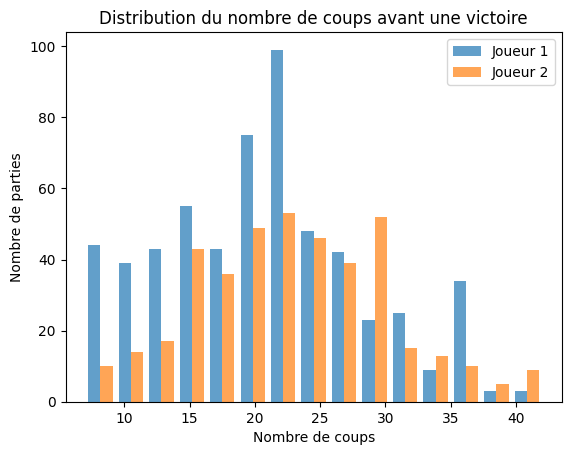

In [ ]:
# 4
def analyse_distribution(joueur1, joueur2, n=1000):
    victoires_joueur1 = []
    victoires_joueur2 = []

    for _ in range(n):
        result, plateau = run(joueur1, joueur2)
        total_moves = np.count_nonzero(plateau.grille)
        if result == 1:
            victoires_joueur1.append(total_moves)
        elif result == -1:
            victoires_joueur2.append(total_moves)

    # Afficher histogramme
    plt.hist([victoires_joueur1, victoires_joueur2], label=['Joueur 1', 'Joueur 2'], alpha=0.7, bins=15)
    plt.title('Distribution du nombre de coups avant une victoire')
    plt.xlabel('Nombre de coups')
    plt.ylabel('Nombre de parties')
    plt.legend()
    plt.show()

analyse_distribution(JoueurAleatoire(), JoueurAleatoire())

Cette distribution donne une vue d'ensemble du nombre de coups nécessaires pour gagner lorsque les joueurs jouent aléatoirement.
Observations et interprétations :
Le joueur 1 a un léger avantage car il commence en premier. Ainsi, il est possible qu'il ait plus de chances de gagner en moins de coups que le joueur 2.
Cette distribution ne semble pas suivre une loi de probabilité classique comme la loi exponentielle ou la loi de Poisson, étant donné la nature du jeu et la stratégie aléatoire.
L'analyse proposée ici est basée sur une observation qualitative des distributions. Une analyse quantitative pourrait être menée pour confirmer ces observations, notamment par des tests d'adéquation à une distribution théorique.


5

Pour trouver la probabilité d'une partie nulle lorsque les deux joueurs jouent aléatoirement, nous pouvons effectuer une expérience de Monte Carlo. Voici comment cela pourrait être fait : <br/>
Étape 1 : Définir l'expérience  <br/>
Faire jouer deux joueurs aléatoires l'un contre l'autre. <br/>
Noter si le jeu se termine par une victoire pour l'un des joueurs ou par une partie nulle (plateau complet sans victoire). <br/>
Étape 2 : Répéter l'expérience  <br/>
Répéter l'expérience un grand nombre de fois, disons $N$ (par exemple 10 000 ou 100 000 fois). <br/>
Compter le nombre de fois $n$ où le jeu se termine par une partie nulle. <br/>
Étape 3 : Estimer la probabilité  <br/>
La probabilité estimée $P$ d'une partie nulle lorsque les deux joueurs jouent aléatoirement est donnée par : <br/>
$P = \frac{n}{N}$


In [ ]:
def experience_partie_nulle(joueur1, joueur2, n=10000):
    nuls = 0
    for _ in range(n):
        result, _ = run(joueur1, joueur2)
        if result == 0:
            nuls += 1
    proba_nulle = nuls / n
    return proba_nulle

proba = experience_partie_nulle(JoueurAleatoire(), JoueurAleatoire())
print(f"La probabilité estimée d'une partie nulle est d'environ {proba*100:.2f}%.")

La probabilité estimée d'une partie nulle est d'environ 0.18%.


6

Pour estimer une borne théorique à la probabilité d'une partie nulle lorsque les joueurs jouent aléatoirement, faisons quelques hypothèses simplificatrices :
1.	Hypothèse de remplissage complet : On joue une partie jusqu'à ce que toutes les cases soient occupées, même si l'un des deux joueurs a gagné avant. Cela signifie que le plateau est entièrement rempli à la fin du jeu.
2.	Hypothèse d'indépendance : Chaque ensemble de quatre cases connectées a une chance égale d'être occupé par les jetons des deux joueurs de manière équivalente. Autrement dit, pour tout quadruplet de cases adjacentes, il y a une probabilité de 1/16 que ces cases soient toutes occupées par le joueur 1 ou le joueur 2 (car 2^4 = 16 combinaisons possibles, dont 2 sont tout rouge ou tout bleu). <br/>
Avec ces hypothèses, nous pouvons calculer la probabilité d'une partie nulle.
La probabilité qu'un ensemble spécifique de quatre cases connectées ne soit pas occupé entièrement par un seul joueur est : <br/>
$P_{non\_gagne} = 1 - \frac{2}{16} = \frac{14}{16} = 0.875$ <br/>
Mais il y a de nombreux ensembles de quatre cases connectées sur le plateau. Pour un plateau 7x6, il y a :
*	24 quadruplets horizontaux
*	21 quadruplets verticaux
*	12 quadruplets diagonaux (de /)
*	12 quadruplets diagonaux (de ) <br/>
Pour un total de 69 quadruplets. <br/>
La probabilité qu'aucun de ces ensembles ne soit une victoire est :
$P_{nulle} = (0.875)^{69}$




7

La borne théorique maximale du nombre de parties différentes qui peuvent être jouées est basée sur le nombre total de façons de remplir le plateau.

Cependant, 42! est une surestimation car cela suppose que chaque position sur le plateau peut être occupée par n'importe lequel des 42 jetons joués pendant la partie. En réalité, chaque colonne ne peut contenir que 6 jetons, et chaque position dans une colonne est déterminée par le nombre de jetons déjà dans cette colonne.

Une meilleure estimation serait basée sur le produit des combinaisons de chaque colonne. Pour simplifier, si nous supposons que chaque colonne est remplie uniformément, chaque colonne aurait $\binom{42}{6}$ façons d'être remplie. Étant donné qu'il y a 7 colonnes, une  estimation du nombre de parties différentes serait $(\binom{42}{6})^7$.

Une méthode pour approximer le nombre de parties différentes serait de simuler un grand nombre de parties aléatoires et de stocker chaque configuration de plateau unique rencontrée.

Cette méthode ne donnera qu'une sous-estimation du nombre réel de parties possibles, car la probabilité de rejouer exactement la même partie est extrêmement faible, même après des milliers de simulations. Mais, en augmentant le nombre de simulations, cette approximation deviendra de plus en plus précise.

In [ ]:
def approximate_unique_games(joueur1, joueur2, n=10000):
    unique_games = set()
    for _ in range(n):
        result, plateau = run(joueur1, joueur2)
        game_result = tuple(map(tuple, plateau.grille))
        unique_games.add(game_result)
    return len(unique_games)

n = 10000
print(f"Avec {n} parties simulées, il y a {approximate_unique_games(JoueurAleatoire(), JoueurAleatoire())} parties uniques.")

Avec 10000 parties simulées, il y a 9958 parties uniques.


8

En faisant varier le nombre de colonnes et de lignes du plateau de jeu de Puissance 4, plusieurs aspects des lois étudiées précédemment sont susceptibles de changer.

1.	Probabilité d'une partie nulle :
La probabilité d'une partie nulle devrait augmenter à mesure que la taille du plateau diminue.
2.	Nombre de parties différentes :
Le nombre potentiel de parties différentes augmentera de manière exponentielle avec la taille du plateau.
3.	Distribution du nombre de coups avant la victoire :
Avec un plateau plus grand, la distribution pourrait s'étendre, car il pourrait y avoir plus de coups nécessaires pour obtenir une victoire, surtout si le nombre requis pour une victoire reste à 4.


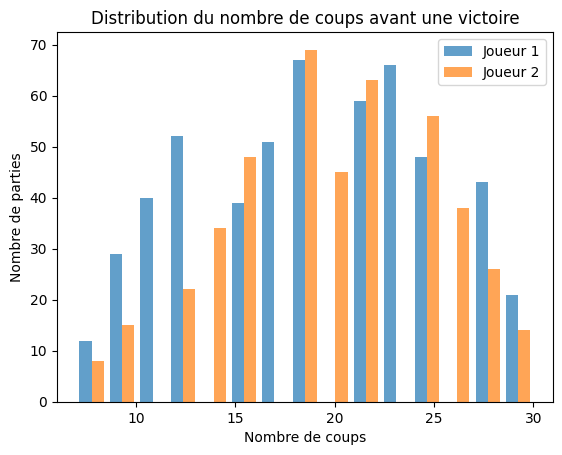

La probabilité estimée d'une partie nulle est d'environ 3.68%.
Avec 10000 parties simulées, il y a 9901 parties uniques.


In [ ]:
LIGNES = 5
COLONNES = 6

analyse_distribution(JoueurAleatoire(), JoueurAleatoire())

proba = experience_partie_nulle(JoueurAleatoire(), JoueurAleatoire())
print(f"La probabilité estimée d'une partie nulle est d'environ {proba*100:.2f}%.")

n = 10000
print(f"Avec {n} parties simulées, il y a {approximate_unique_games(JoueurAleatoire(), JoueurAleatoire())} parties uniques.")

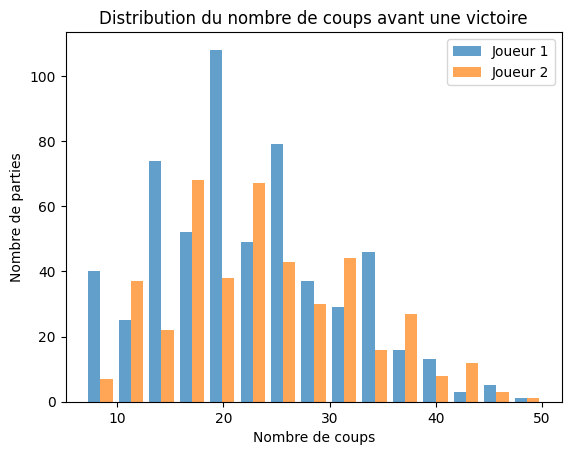

La probabilité estimée d'une partie nulle est d'environ 0.00%.
Avec 10000 parties simulées, il y a 9980 parties uniques.


In [ ]:
LIGNES = 7
COLONNES = 8

analyse_distribution(JoueurAleatoire(), JoueurAleatoire())

proba = experience_partie_nulle(JoueurAleatoire(), JoueurAleatoire())
print(f"La probabilité estimée d'une partie nulle est d'environ {proba*100:.2f}%.")

n = 10000
print(f"Avec {n} parties simulées, il y a {approximate_unique_games(JoueurAleatoire(), JoueurAleatoire())} parties uniques.")

# 2 Algorithme de Monte-Carlo

In [32]:
class JoueurMonteCarlo:
    def __init__(self, N=20):
        self.N = N  # Nombre de simulations par action possible

    def play(self, plateau, joueur):
        actions = [c for c in range(COLONNES) if plateau.grille[0][c] == 0]
        recompenses = {action: 0 for action in actions}

        for action in actions:
            for _ in range(self.N):
                resultat = self.simule_partie(copy.deepcopy(plateau), joueur, action)
                recompenses[action] += resultat * joueur

        # Trouver l'action avec la plus grande récompense moyenne
        meilleure_action = max(recompenses, key=recompenses.get)
        return meilleure_action

    def simule_partie(self, plateau, joueur, action):
        plateau.play(action, joueur)

        while not plateau.is_finished():
            joueur = -joueur
            action = np.random.choice([c for c in range(COLONNES) if plateau.grille[0][c] == 0])
            plateau.play(action, joueur)

        if plateau.has_won(joueur=1):
            return 1
        elif plateau.has_won(joueur=-1):
            return -1
        else:
            return 0

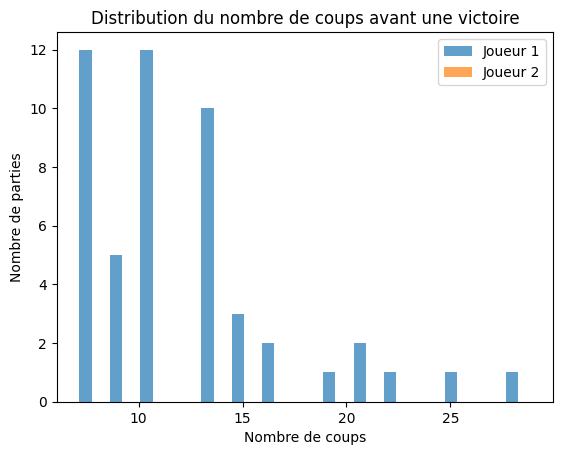

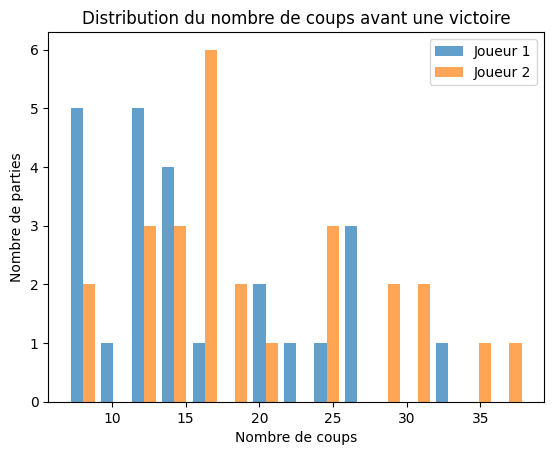

In [33]:
LIGNES = 6
COLONNES = 7

analyse_distribution(JoueurMonteCarlo(), JoueurAleatoire(), 50)
analyse_distribution(JoueurMonteCarlo(), JoueurMonteCarlo(), 50)

# 3 Bandits-manchots

In [26]:
def jouer_levier(leviers, action):
    proba = leviers[action]
    return np.random.binomial(1, proba)

In [27]:
def algo_aleatoire(recompenses_moyennes, nb_fois_levier_joue):
    return np.random.choice(len(recompenses_moyennes))

def algo_greedy(recompenses_moyennes, nb_fois_levier_joue):
    return np.argmax(recompenses_moyennes)

def algo_egreedy(recompenses_moyennes, nb_fois_levier_joue, epsilon=0.1):
    if np.random.uniform() < epsilon:
        return np.random.choice(len(recompenses_moyennes))
    else:
        return np.argmax(recompenses_moyennes)

def algo_ucb(recompenses_moyennes, nb_fois_levier_joue):
    t = np.sum(nb_fois_levier_joue) + 1
    bonus = np.sqrt(2 * np.log(t) / (np.array(nb_fois_levier_joue) + 1e-10))  # ajout d'une petite constante pour éviter la division par zéro
    return np.argmax(recompenses_moyennes + bonus)

In [28]:
def experiment(leviers, algo, T=1000):
    recompenses_moyennes = np.zeros(len(leviers))
    nb_fois_levier_joue = np.zeros(len(leviers))
    total_gains = []
    gain_cumulatif = 0

    for t in range(T):
        choix = algo(recompenses_moyennes, nb_fois_levier_joue)
        gain = jouer_levier(leviers, choix)
        gain_cumulatif += gain
        total_gains.append(gain_cumulatif)

        nb_fois_levier_joue[choix] += 1
        recompenses_moyennes[choix] = (recompenses_moyennes[choix] * (nb_fois_levier_joue[choix] - 1) + gain) / nb_fois_levier_joue[choix]

    return total_gains

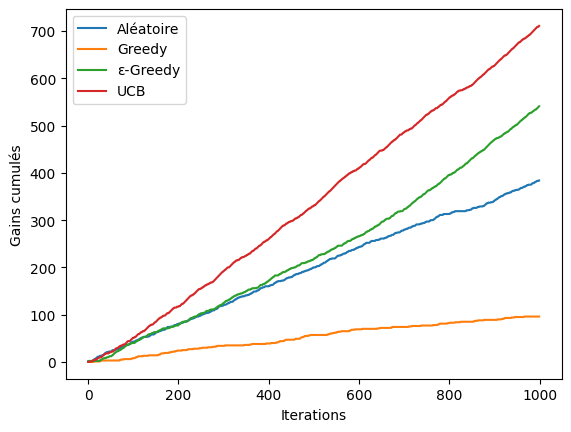

In [29]:
leviers = [0.1, 0.2, 0.3, 0.5, 0.8]
T = 1000

gains_aleatoire = experiment(leviers, algo_aleatoire, T)
gains_greedy = experiment(leviers, algo_greedy, T)
gains_egreedy = experiment(leviers, algo_egreedy, T)
gains_ucb = experiment(leviers, algo_ucb, T)

plt.plot(gains_aleatoire, label="Aléatoire")
plt.plot(gains_greedy, label="Greedy")
plt.plot(gains_egreedy, label="ε-Greedy")
plt.plot(gains_ucb, label="UCB")
plt.legend()
plt.xlabel("Iterations")
plt.ylabel("Gains cumulés")
plt.show()

1. Algorithme UCB (Upper Confidence Bound) :
L'UCB a le rendement le plus élevé parmi tous les algorithmes testés. Cela est dû au fait que l'algorithme UCB est conçu pour équilibrer judicieusement entre l'exploration des leviers moins joués et l'exploitation des leviers les mieux performants jusqu'à présent. Le terme mathématique ajouté dans UCB permet d'attribuer une valeur plus élevée aux leviers moins joués, encourageant ainsi l'exploration. C'est une stratégie efficace, en particulier dans des environnements où la vraie valeur d'un levier n'est pas connue à l'avance.

2. Algorithme ε-Greedy :
Le ε-Greedy se situe entre UCB et les autres méthodes. Il allie exploration (choix aléatoire avec une probabilité ε) et exploitation (choisir le meilleur levier basé sur les connaissances actuelles). Cependant, sa stratégie d'exploration est moins sophistiquée que celle de l'UCB, ce qui pourrait expliquer pourquoi il est en deuxième position.

3. Algorithme Aléatoire :
Étonnamment, l'algorithme aléatoire ne se situe pas à la dernière place. Cela pourrait être dû au fait qu'il explore constamment sans exploiter, ce qui peut être bénéfique dans certains scénarios où les distributions de récompense sont proches les unes des autres.

4. Algorithme Greedy :
Le Greedy performe le moins bien car il exploite constamment sur la base de ses connaissances initiales et n'explore jamais de nouvelles options. Si son choix initial n'est pas le levier optimal, il restera bloqué avec un rendement suboptimal.

Conclusion :
Ces résultats soulignent l'importance de l'équilibre entre exploration et exploitation. Dans des environnements incertains où l'on ne connaît pas la meilleure option à l'avance, une exploration intelligente, comme celle proposée par l'UCB, peut conduire à de meilleures performances à long terme. De plus, il est risqué de se fier uniquement à l'exploitation, comme le montre l'algorithme Greedy, car cela peut entraîner un piège d'optimalité locale.

Cela dit, la meilleure stratégie dépend toujours du contexte et de la distribution des récompenses. Dans certains scénarios, ε-Greedy ou même une stratégie aléatoire pourrait se rapprocher ou dépasser l'UCB. Il est donc essentiel d'adapter sa stratégie en fonction du contexte.

# 4 Arbre d'exploration et UCT

In [71]:
class Noeud:
    def __init__(self, parent=None, action=None, c=1.0):
        self.parent = parent
        self.action = action
        self.enfants = {}
        self.victoires = 0
        self.visites = 0
        self.c = c

    def ucb(self):
        if self.visites == 0:
            return float("inf")
        q = self.victoires / self.visites
        u = self.c * np.sqrt(2 * np.log(self.parent.visites) / self.visites)
        return q + u

    def meilleur_enfant(self):
        return max(self.enfants.values(), key=lambda x: x.ucb())

    def est_feuille(self):
        return not self.enfants

class JoueurUCT:
    def __init__(self, c=1.0, n_simulations=100):
        self.c = c
        self.n_simulations = n_simulations

    def play(self, plateau, joueur):
        racine = Noeud(c=self.c)

        for _ in range(self.n_simulations):
            noeud = racine
            plat = Plateau()
            plat.grille = plateau.grille.copy()

            # Étape de sélection
            while not noeud.est_feuille() and not plat.is_finished():
                action = noeud.meilleur_enfant().action
                plat.play(action, 1 if action % 2 == 0 else -1)
                noeud = noeud.enfants[action]

            # Étape d'expansion
            if not plat.is_finished():
                action = JoueurAleatoire().play(plat, 1 if plat.grille.sum() % 2 == 0 else -1)
                enfant = Noeud(parent=noeud, action=action, c=self.c)
                noeud.enfants[action] = enfant
                plat.play(action, 1 if action % 2 == 0 else -1)
                noeud = enfant

            # Étape de simulation
            joueur_courant = 1 if plat.grille.sum() % 2 == 0 else -1
            while not plat.is_finished():
                coup = JoueurAleatoire().play(plat, joueur_courant)
                plat.play(coup, joueur_courant)
                joueur_courant *= -1

            # Étape de rétro-propagation
            resultat = 0
            if plat.has_won(1):
                resultat = 1
            elif plat.has_won(-1):
                resultat = -1

            while noeud:
                noeud.visites += 1
                noeud.victoires += resultat
                noeud = noeud.parent
                resultat *= -1

        return max(racine.enfants.values(), key=lambda x: x.victoires).action

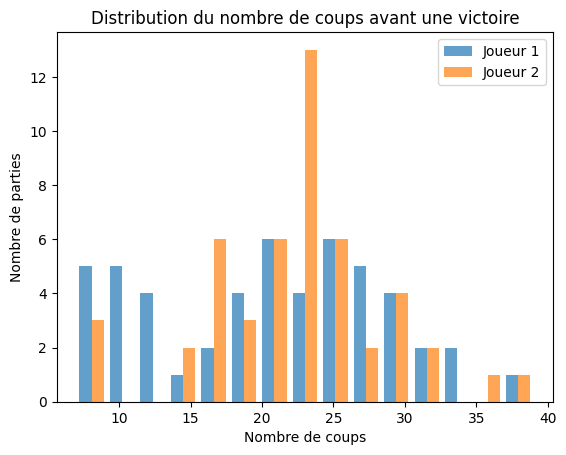

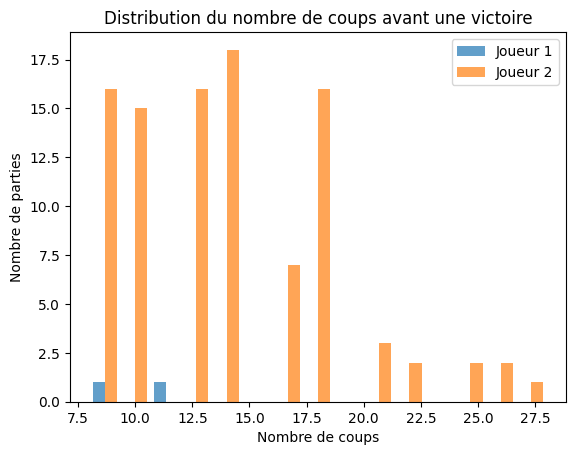

In [72]:
analyse_distribution(JoueurUCT(), JoueurAleatoire(), 100)
analyse_distribution(JoueurUCT(), JoueurMonteCarlo(), 100)

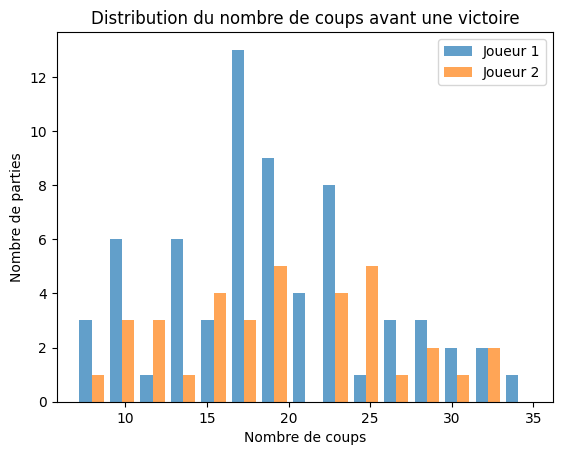

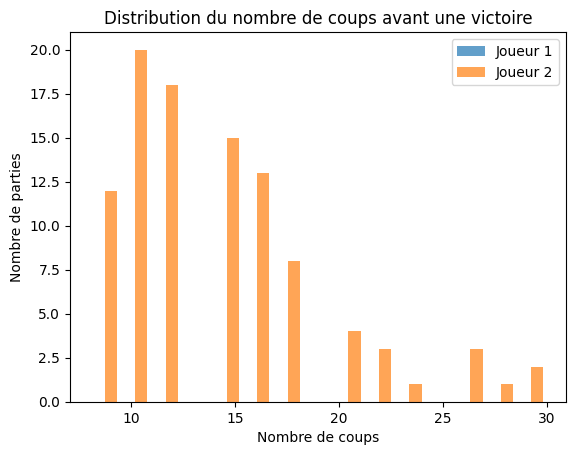

In [73]:
analyse_distribution(JoueurUCT(c=1.4), JoueurAleatoire(), 100)
analyse_distribution(JoueurUCT(c=1.4), JoueurMonteCarlo(), 100)

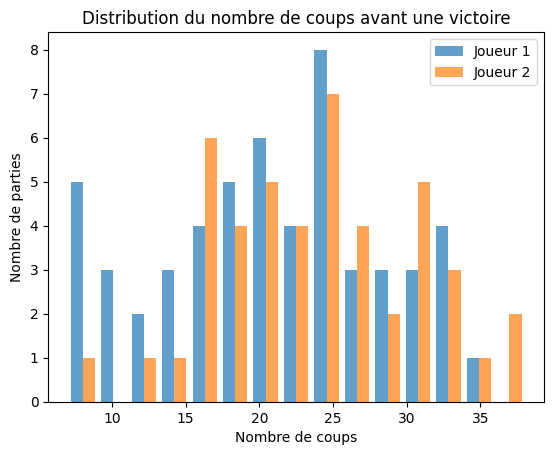

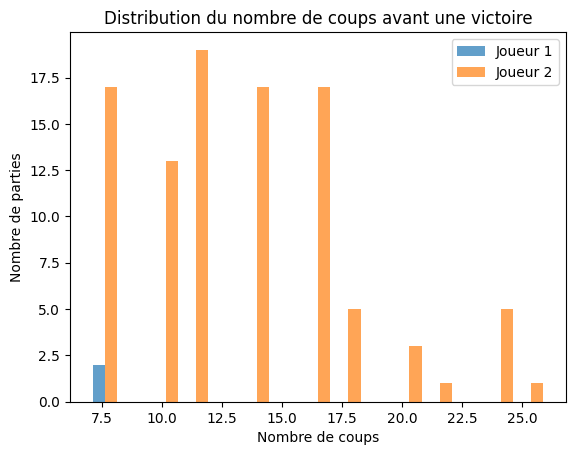

In [74]:
analyse_distribution(JoueurUCT(n_simulations=20), JoueurAleatoire(), 100)
analyse_distribution(JoueurUCT(n_simulations=20), JoueurMonteCarlo(), 100)